This notebook is meant to filter patients based on inclusion criteria presented in Sup Table 1 of [(Crandall et al. 2019)](https://pmc.ncbi.nlm.nih.gov/articles/PMC6374270/)

In [1]:
import pandas as pd
import numpy as np
import missingno as mso

In [2]:
!ls

 AI_READY_DF.csv		   Measurements   Psychosocial
 AI_READY_DOWNSAMPLED.csv	   Med_History	  Specimen_Results
 Demographics			   Medications	  Supplemental_Forms
 Diet				   OS_Followup
'EDA - Inclusion Criteria.ipynb'   Outcomes


In [3]:
!ls Demographics/

adh_cad_inv.dat    f20_ctos_inv.dat	     f4_ht_inv.dat
adh_ht_inv.dat	   f2_ctos_inv.dat	     f54_ct_inv.dat
dem_ctos_inv.dat   f41_ctos_inv.dat	     fust_ctos_inv.dat
f10_50_ht_inv.dat  f41_imputed_ctos_inv.dat  unbl_ct_inv.dat
f17_cad_inv.dat    f42_os_inv.dat


### 1. Age 65+ removal

In [4]:
age_data = pd.read_csv("Demographics/dem_ctos_inv.dat", delimiter = "\t")
age_data["AGE"]

0         54
1         62
2         64
3         69
4         53
          ..
161803    53
161804    69
161805    67
161806    75
161807    58
Name: AGE, Length: 161808, dtype: int64

In [5]:
pat_inclusion = age_data[(age_data["AGE"] < 65)]["ID"].tolist()
len(pat_inclusion)

90769

### 2. Removal of Patients using bisphosphonates, calcitonin, parathyroid hormone, selective estrogen receptor modulators, luteinizing hormone-releasing hormone agents, and somatostatin agents 

Checking form 150 for CT, and form 143-148 for OS

In [6]:
!ls Medications/

f150_ht_inv.dat		       f153ref_meds.dat        f44ref_med_ingreds.dat
f153_barriers_ctos_inv.dat     f154_ctos_inv.dat       f44ref_meds.dat
f153_medications_ctos_inv.dat  f43_ctos_inv.dat        f45_ctos_inv.dat
f153ref_med_classes.dat        f44_ctos_inv.dat
f153ref_med_ingreds.dat        f44ref_med_classes.dat


In [7]:
#bisphosphonates, calcitonin, parathyroid hormone (OSTPL_)
tccs2 = [300420, 300430, 300440, 300700, 301700, 300530, 300600, 300699, 554010]
tccs = [300420, 300430]


drug_ids = pd.read_csv("Medications/f44_ctos_inv.dat", sep='\t')
drug_ids = drug_ids[drug_ids['F44VTYP'] == 1]
drug_ids = drug_ids[drug_ids["ID"].isin(pat_inclusion)]
drug_ids = drug_ids[drug_ids["TCCODE"].isin(tccs)]
drug_ids = drug_ids[drug_ids["TCCODE"].isin(tccs2)]
drug_ids = drug_ids["ID"].tolist()

pat_inclusion = [i for i in pat_inclusion if i not in drug_ids]
len(pat_inclusion)



89681

### 3. Removal of participants who had one or more risk assessment tools incomplete.

In [8]:
"""
Fracture History (F30 - BKBONE)
Glucocorticosteroid (F44 - CORT)
Rheumatoid Arthritis (F30 - RHEUMAT)
Secondary Osteoperosis (CANNOT FIND)
3 or more Alcohol/Day (F42 - ALCOHLOS)
Femoral Neck T Score (BMD Hip Scan - HIPNKTSCOR)
"""

'\nFracture History (F30 - BKBONE)\nGlucocorticosteroid (F44 - CORT)\nRheumatoid Arthritis (F30 - RHEUMAT)\nSecondary Osteoperosis (CANNOT FIND)\n3 or more Alcohol/Day (F42 - ALCOHLOS)\nFemoral Neck T Score (BMD Hip Scan - HIPNKTSCOR)\n'

In [9]:
!ls Psychosocial

f34_ctos_inv.dat  f37_ctos_inv.dat     f39_ht_inv.dat
f35_ct_inv.dat	  f38_ctos_fu_inv.dat


In [10]:
#Weight, Height (F80-HEIGHT, WEIGHT)
sex_weight_height = pd.read_csv("Measurements/f80_ctos_inv.dat", delimiter = "\t")
sex_weight_height = sex_weight_height[sex_weight_height["ID"].isin(pat_inclusion)]
sex_weight_height = sex_weight_height.dropna(subset=["WEIGHT", "HEIGHT"])
sex_weight_height = set(sex_weight_height["ID"].tolist())
print("sex_weight_height", len(sex_weight_height))

#Fracture History (F30 - BKBONE)
fraxhist = pd.read_csv("Med_History/f30_ctos_inv.dat", delimiter = "\t")
fraxhist = fraxhist[fraxhist["ID"].isin(pat_inclusion)]
fraxhist = fraxhist.dropna(subset=["BKBONE"])
fraxhist = set(fraxhist["ID"].tolist())
print("fraxhist", len(fraxhist))

#Parents Fracture History (F32 - BKBONMOM, BKBONDAD)
p_fraxhist = pd.read_csv("Med_History/f32_ctos_inv.dat", delimiter = "\t")
p_fraxhist = p_fraxhist[p_fraxhist["ID"].isin(pat_inclusion)]
p_fraxhist = p_fraxhist.dropna(subset=["BKBONMOM", "BKBONDAD"])
p_fraxhist = set(p_fraxhist["ID"].tolist())
print("p_fraxhist", len(p_fraxhist))

#Current Smoking (F34 - SMOKNOW)
smoke = pd.read_csv("Psychosocial/f34_ctos_inv.dat", delimiter = "\t")
smoke = smoke[smoke["ID"].isin(pat_inclusion)]
smoke = smoke.dropna(subset=["SMOKEVR"])
smoke = set(smoke["ID"].tolist())
print("smoke", len(smoke))

#Glucocorticosteroid (F44 - CORT)
cort = pd.read_csv("Medications/f44_ctos_inv.dat", delimiter = "\t")
cort = cort[cort['F44VTYP'] == 1]
cort = cort[cort["ID"].isin(pat_inclusion)]
#cort = cort.dropna(subset=["CORT"])
cort = set(cort["ID"].tolist())
print("cort", len(cort))

#Rheumatoid Arthritis (F30 - RHEUMAT)
RHEUMAT = pd.read_csv("Med_History/f30_ctos_inv.dat", delimiter = "\t")
RHEUMAT = RHEUMAT[RHEUMAT["ID"].isin(pat_inclusion)]
RHEUMAT = RHEUMAT.dropna(subset=["ARTHRIT"])
RHEUMAT = set(RHEUMAT["ID"].tolist())
print("RHEUMAT", len(RHEUMAT))

#3 or more Alcohol/Day (F42 - ALCOHLOS)
ALCOHLOS = pd.read_csv("Psychosocial/f34_ctos_inv.dat", delimiter = "\t")
ALCOHLOS = ALCOHLOS[ALCOHLOS["ID"].isin(pat_inclusion)]
ALCOHLOS = ALCOHLOS.dropna(subset=["ALCSWK"])
ALCOHLOS = set(ALCOHLOS["ID"].tolist())
print("ALCOHLOS", len(ALCOHLOS))

pat_inclusion = set(pat_inclusion)
pat_inclusion = list(pat_inclusion & sex_weight_height & fraxhist & p_fraxhist & smoke & cort & RHEUMAT & ALCOHLOS)

print(len(pat_inclusion))


sex_weight_height 89556
fraxhist 84416
p_fraxhist 80304
smoke 89072
cort 89679
RHEUMAT 88944
ALCOHLOS 89343
74774


In [11]:
pat_inclusion

[131073,
 262147,
 131075,
 262149,
 262150,
 262151,
 131076,
 131081,
 262154,
 131082,
 131085,
 262158,
 131087,
 262160,
 131094,
 131097,
 262170,
 262171,
 262172,
 262173,
 131100,
 131101,
 131102,
 262177,
 131104,
 262179,
 262180,
 131105,
 131107,
 262184,
 131113,
 131114,
 262187,
 131115,
 131116,
 262190,
 131117,
 131118,
 262193,
 262195,
 131123,
 131126,
 131127,
 131128,
 131129,
 262204,
 131136,
 131137,
 262212,
 131145,
 131146,
 262220,
 262225,
 131153,
 131155,
 262228,
 262229,
 131158,
 262232,
 131161,
 262234,
 262235,
 262236,
 131164,
 131165,
 262241,
 131169,
 131171,
 262246,
 262247,
 262248,
 131175,
 262250,
 262251,
 131180,
 131182,
 262255,
 262256,
 131184,
 262259,
 131187,
 262261,
 131188,
 131189,
 262264,
 262265,
 262266,
 262267,
 131190,
 131192,
 262270,
 131193,
 131199,
 131204,
 262277,
 262279,
 131207,
 262281,
 262283,
 131211,
 262287,
 131216,
 262289,
 131218,
 262291,
 262292,
 131220,
 262294,
 262295,
 262296,
 262298,
 

### Stratification by OS or CT

In [12]:
!ls Demographics

adh_cad_inv.dat    f20_ctos_inv.dat	     f4_ht_inv.dat
adh_ht_inv.dat	   f2_ctos_inv.dat	     f54_ct_inv.dat
dem_ctos_inv.dat   f41_ctos_inv.dat	     fust_ctos_inv.dat
f10_50_ht_inv.dat  f41_imputed_ctos_inv.dat  unbl_ct_inv.dat
f17_cad_inv.dat    f42_os_inv.dat


In [13]:
group_study =  pd.read_csv("Demographics/dem_ctos_inv.dat", delimiter = "\t")
group_study = group_study[group_study["ID"].isin(pat_inclusion)]
group_study

,ID,CTFLAG,HRTFLAG,DMFLAG,CADFLAG,OSFLAG,EXTFLAG,EXTDAYS,EXTSTARTYR,EXT2FLAG,...,CADARM,CADDAYS,BMDFLAG,SHAREPPT,LATREGION,WATTSCAT,LANGLEYSCAT,LATREGIONCAD,WATTSCATCAD,LANGLEYSCATCAD
0,100001,0,0,0,0,1,1,3492.0,10.0,1,...,0,NaN,0,0,3,2,1,NaN,NaN,NaN
1,100003,0,0,0,0,1,0,NaN,NaN,0,...,0,NaN,0,0,1,4,5,NaN,NaN,NaN
2,100004,1,1,0,0,0,1,3466.0,11.0,1,...,0,NaN,0,0,3,1,1,NaN,NaN,NaN
4,100006,0,0,0,0,1,0,NaN,NaN,0,...,0,NaN,0,0,3,1,1,NaN,NaN,NaN
5,100007,0,0,0,0,1,0,NaN,NaN,0,...,0,NaN,0,0,2,2,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161794,299982,0,0,0,0,1,1,3220.0,10.0,0,...,0,NaN,0,0,3,2,1,NaN,NaN,NaN
161795,299984,1,0,1,1,0,1,3655.0,11.0,1,...,1,398.0,0,0,3,2,2,3.0,2.0,2.0
161797,299987,0,0,0,0,1,1,2757.0,8.0,1,...,0,NaN,0,0,1,4,5,NaN,NaN,NaN
161803,299995,0,0,0,0,1,1,3110.0,9.0,1,...,0,NaN,0,0,3,1,2,NaN,NaN,NaN


In [14]:
group_study["CTFLAG"].value_counts()

CTFLAG
0    43129
1    31645
Name: count, dtype: int64

### Parsing the Excel

In [15]:
# Load the new Excel file
file_path = "../Dataset/Variable Names (1).xlsx"
xls = pd.ExcelFile(file_path)

# Save all sheets into a single Excel file with each sheet's data appended
df = pd.concat([xls.parse(sheet) for sheet in xls.sheet_names], ignore_index=True)
df.columns = ["Condition", "Variable Name", "Form", "SPECIAL"]


#drop if missing in both variable name and special
df = df.dropna(subset=["Variable Name"], how="all")
df

,Condition,Variable Name,Form,SPECIAL
0,Parkinson’s Disease,PARKINS,30,NaN
1,Rheumatoid Arthritis,RHEUMAT,30,NaN
2,2nd cause Osteoporosis,OSTEOPOR,30,NaN
3,Arthritis,ARTHRIT,30,NaN
4,Cancer,CANC_F30,30,NaN
...,...,...,...,...
82,Any Previous Fracture,BKBONE,30,NaN
83,Hip Fracture,BKHIP,30,NaN
84,Spinal Fracture,BKBACK,30,NaN
85,Wrist Fracture,BKLARM,30,NaN


<Axes: >

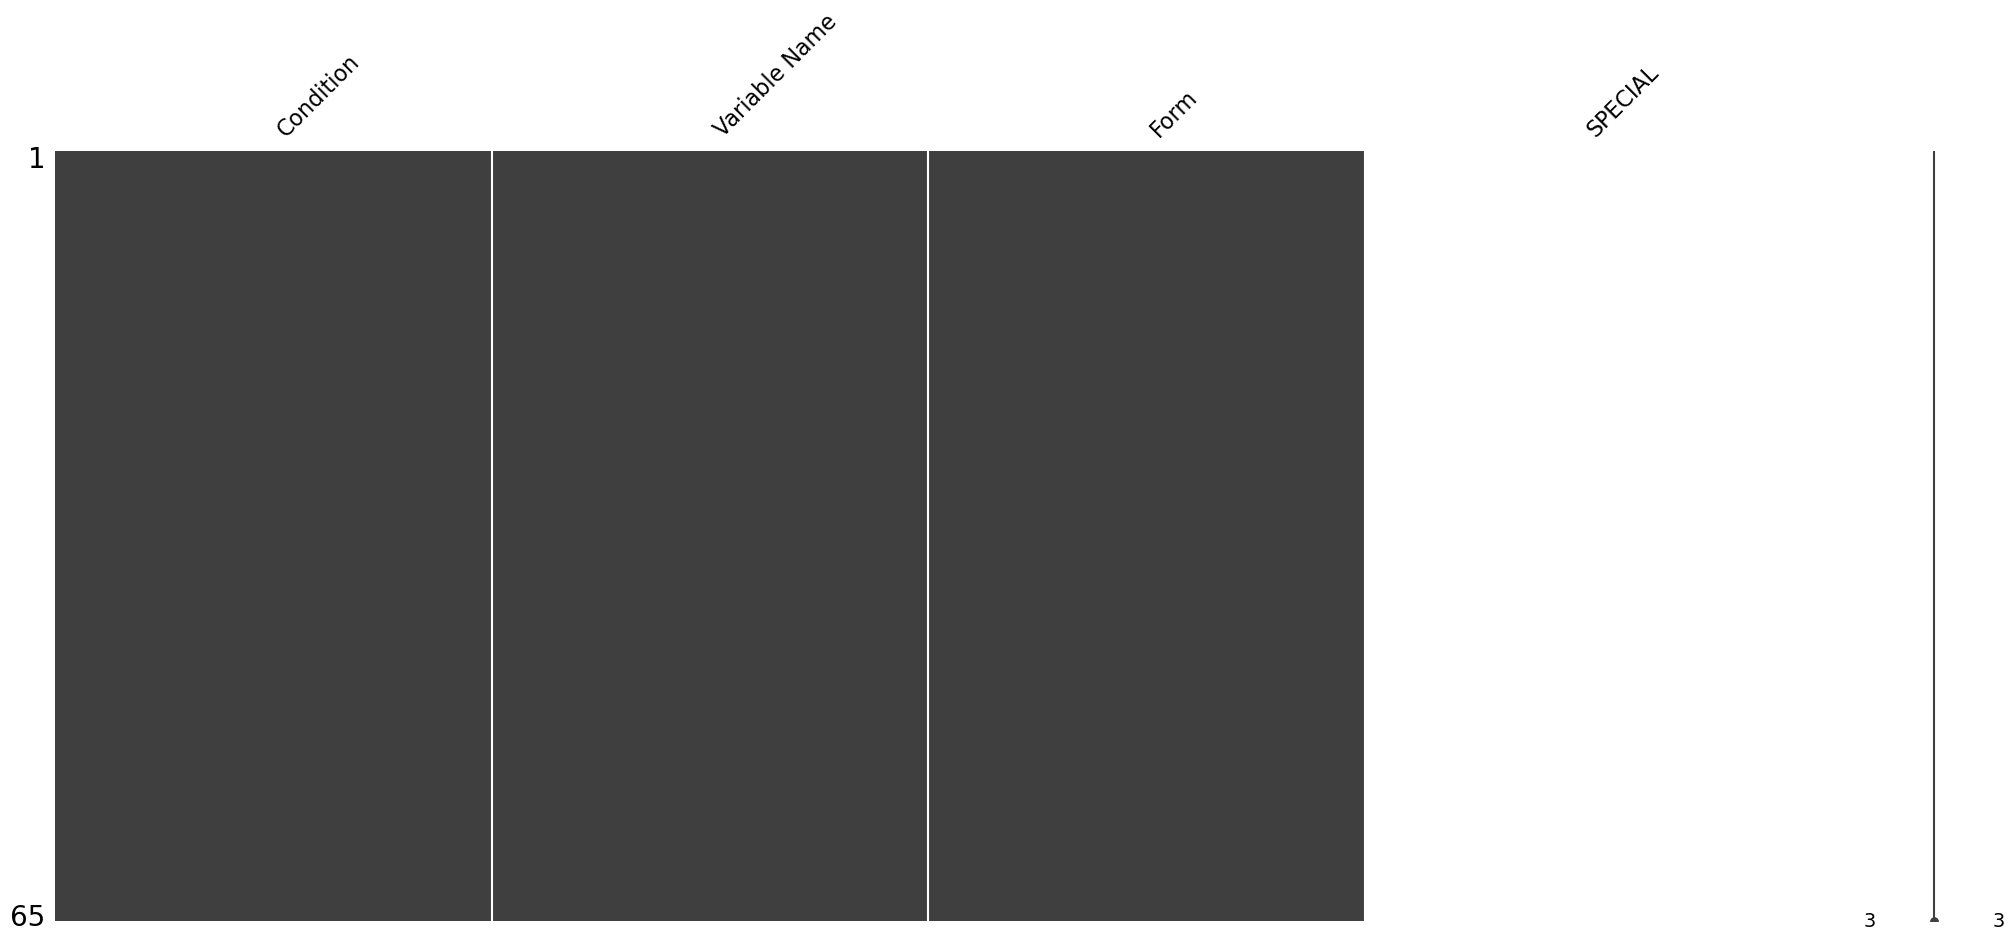

In [16]:
import missingno as mso
mso.matrix(df)

In [17]:
!ls 

 AI_READY_DF.csv		   Measurements   Psychosocial
 AI_READY_DOWNSAMPLED.csv	   Med_History	  Specimen_Results
 Demographics			   Medications	  Supplemental_Forms
 Diet				   OS_Followup
'EDA - Inclusion Criteria.ipynb'   Outcomes


In [18]:
forms_dict = {32: 'Med_History/f32_ctos_inv.dat',
             2: 'Demographics/f2_race_ctos_inv.dat',
             2.0: 'Demographics/f2_ctos_inv.dat',
             34: 'Psychosocial/f34_ctos_inv.dat',
             37: 'Psychosocial/f37_ctos_inv.dat',
             38.0: 'Psychosocial/f38_ctos_fu_inv.dat',
             'Demographics and Study Membership': 'Demographics/dem_ctos_inv.dat',
             'BMD Whole Body': 'Measurements/bmd_wbody_ctos_inv.dat',
             43: 'Medications/f43_ctos_inv.dat',
             44: 'Medications/f44_ctos_inv.dat',
             45: 'Medications/f45_ctos_inv.dat',
             80.0: 'Measurements/f80_ctos_inv.dat',
             'BMD Hip Scan': 'Measurements/bmd_hip_ctos_inv.dat',
             20: 'Demographics/f20_ctos_inv.dat',
             '60 FFQ': 'Diet/f60_ctos_inv.dat',
             'BMD Spine Scan': 'Measurements/bmd_spine_ctos_inv.dat',
             30.0: 'Med_History/f30_ctos_inv.dat',
             31.0: 'Med_History/f31_ctos_inv.dat',
             "ADJ": "Outcomes/outc_ct_os_inv.dat",
             "60 Item": "Diet/f60_item_ctos_inv.dat",
             41: "Demographics/f41_imputed_ctos_inv.dat"}
forms_dict

{32: 'Med_History/f32_ctos_inv.dat',
 2: 'Demographics/f2_ctos_inv.dat',
 34: 'Psychosocial/f34_ctos_inv.dat',
 37: 'Psychosocial/f37_ctos_inv.dat',
 38.0: 'Psychosocial/f38_ctos_fu_inv.dat',
 'Demographics and Study Membership': 'Demographics/dem_ctos_inv.dat',
 'BMD Whole Body': 'Measurements/bmd_wbody_ctos_inv.dat',
 43: 'Medications/f43_ctos_inv.dat',
 44: 'Medications/f44_ctos_inv.dat',
 45: 'Medications/f45_ctos_inv.dat',
 80.0: 'Measurements/f80_ctos_inv.dat',
 'BMD Hip Scan': 'Measurements/bmd_hip_ctos_inv.dat',
 20: 'Demographics/f20_ctos_inv.dat',
 '60 FFQ': 'Diet/f60_ctos_inv.dat',
 'BMD Spine Scan': 'Measurements/bmd_spine_ctos_inv.dat',
 30.0: 'Med_History/f30_ctos_inv.dat',
 31.0: 'Med_History/f31_ctos_inv.dat',
 'ADJ': 'Outcomes/outc_ct_os_inv.dat',
 '60 Item': 'Diet/f60_item_ctos_inv.dat',
 41: 'Demographics/f41_imputed_ctos_inv.dat'}

In [19]:
#add pat id, lable, cohort, frax into the df
sample_feature_df = pd.DataFrame()

#pat id
sample_feature_df["ID"] = pat_inclusion

#cohort
group_study =  pd.read_csv("Demographics/dem_ctos_inv.dat", delimiter = "\t")
group_study = group_study[group_study["ID"].isin(pat_inclusion)]
group_study = group_study.set_index("ID").reindex(pat_inclusion)["CTFLAG"].tolist()
sample_feature_df["CTFLAG"] = group_study

#label
label_df = pd.read_csv("Outcomes/outc_ct_os_inv.dat", delimiter = "\t")
label_df = label_df[label_df["ID"].isin(pat_inclusion)]
labels = label_df.set_index("ID").reindex(pat_inclusion)["ANYFX"].tolist()
sample_feature_df["ANYFX"] = labels

#FRAX SCORES
frax = pd.read_csv("Med_History/risk_scores_inv.dat", delimiter = "\t")
frax = frax[frax["ID"].isin(pat_inclusion)]
frax = frax.set_index("ID").reindex(pat_inclusion)["WHOFRAC"].tolist()
sample_feature_df["FRAX_SCORE"] = frax

In [20]:
from tqdm.notebook import tqdm

#iterate through the df, extract var name and form
for var_name, form in tqdm(zip(df["Variable Name"].tolist(), df["Form"].tolist()), total=len(df)):
    #if no special cases        
    try:
        #look at form
        placeholder = pd.read_csv(forms_dict[form], delimiter="\t")

        #ones that are collected at both screening and main
        if "F37VTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["F37VTYP"] == 1]
        elif "F44VTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["F44VTYP"] == 1]
        elif "F45VTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["F45VTYP"] == 1]
        elif "F80VTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["F80VTYP"] == 1]
        elif "HIPVTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["HIPVTYP"] == 1]
        elif "SPNVTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["SPNVTYP"] == 1]
        elif "WBVTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["WBVTYP"] == 1]
        elif "F60VTYP" in placeholder.columns:
            placeholder = placeholder[placeholder["F60VTYP"] == 1]
    
        #subset, and sort by inclusion list
        placeholder = placeholder.set_index("ID")
        ordering_df = pd.DataFrame(index = pat_inclusion)
        
        # Merge with the original placeholder DataFrame (preserving order, filling missing with NaN)
        sorted_placeholder = ordering_df.merge(placeholder, left_index=True, right_index=True, how='left').reset_index()
        sorted_placeholder.rename(columns={'index': 'Patient ID'}, inplace=True)
    
        #get the get the actual data
        sample_feature_df[var_name] = sorted_placeholder[var_name]
    except:
        #compute yourself
        print("not found:")
        print("\tvar Name: % s" % var_name)
        print("\tform name: %s" % form)
        print("\tform path: %s" % forms_dict[form])
        

sample_feature_df    
    
    

  0%|          | 0/65 [00:00<?, ?it/s]

not found:
	var Name: F60DAIRY
	form name: 60 FFQ
	form path: Diet/f60_ctos_inv.dat
not found:
	var Name: MILK
	form name: 60 Item
	form path: Diet/f60_item_ctos_inv.dat


,ID,CTFLAG,ANYFX,FRAX_SCORE,PARKINS,RHEUMAT,OSTEOPOR,ARTHRIT,CANC_F30,CATARACT,...,F60CALC,F60VITD,F60VITA,TEXPWK,WALKSPD,BKBONE,BKHIP,BKBACK,BKLARM,SMOKING
0,131073,1,0,6.14,0.0,NaN,0.0,0.0,0.0,0.0,...,1346.75342,7.92636,975.84083,2.50000,3.0,1.0,0.0,0.0,1.0,1.0
1,262147,1,0,8.05,0.0,8.0,0.0,1.0,0.0,0.0,...,965.85001,6.49924,848.40762,26.83333,3.0,0.0,NaN,NaN,NaN,1.0
2,131075,0,0,12.88,0.0,8.0,0.0,1.0,0.0,1.0,...,631.89585,2.43200,629.72861,21.00000,3.0,1.0,NaN,NaN,NaN,1.0
3,262149,0,0,8.78,0.0,8.0,0.0,1.0,0.0,0.0,...,768.10932,1.85852,339.14853,32.83333,4.0,0.0,NaN,NaN,NaN,1.0
4,262150,1,1,1.73,NaN,NaN,NaN,0.0,0.0,NaN,...,536.54505,3.63204,1574.51101,21.83333,3.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74769,262130,1,0,3.07,0.0,NaN,0.0,0.0,0.0,0.0,...,414.01853,2.00980,668.50414,0.00000,3.0,1.0,0.0,0.0,0.0,0.0
74770,131066,1,0,3.94,0.0,NaN,0.0,0.0,0.0,0.0,...,450.93347,2.70774,334.67271,7.50000,3.0,0.0,NaN,NaN,NaN,0.0
74771,262131,0,0,4.45,0.0,NaN,0.0,0.0,0.0,0.0,...,1543.24417,8.60105,1195.77043,17.08333,3.0,0.0,NaN,NaN,NaN,1.0
74772,131068,1,0,8.54,0.0,NaN,0.0,0.0,0.0,0.0,...,1219.16215,9.84910,1169.27512,0.00000,NaN,1.0,0.0,0.0,0.0,0.0


### Sample X Feature Matrix Impute

<Axes: >

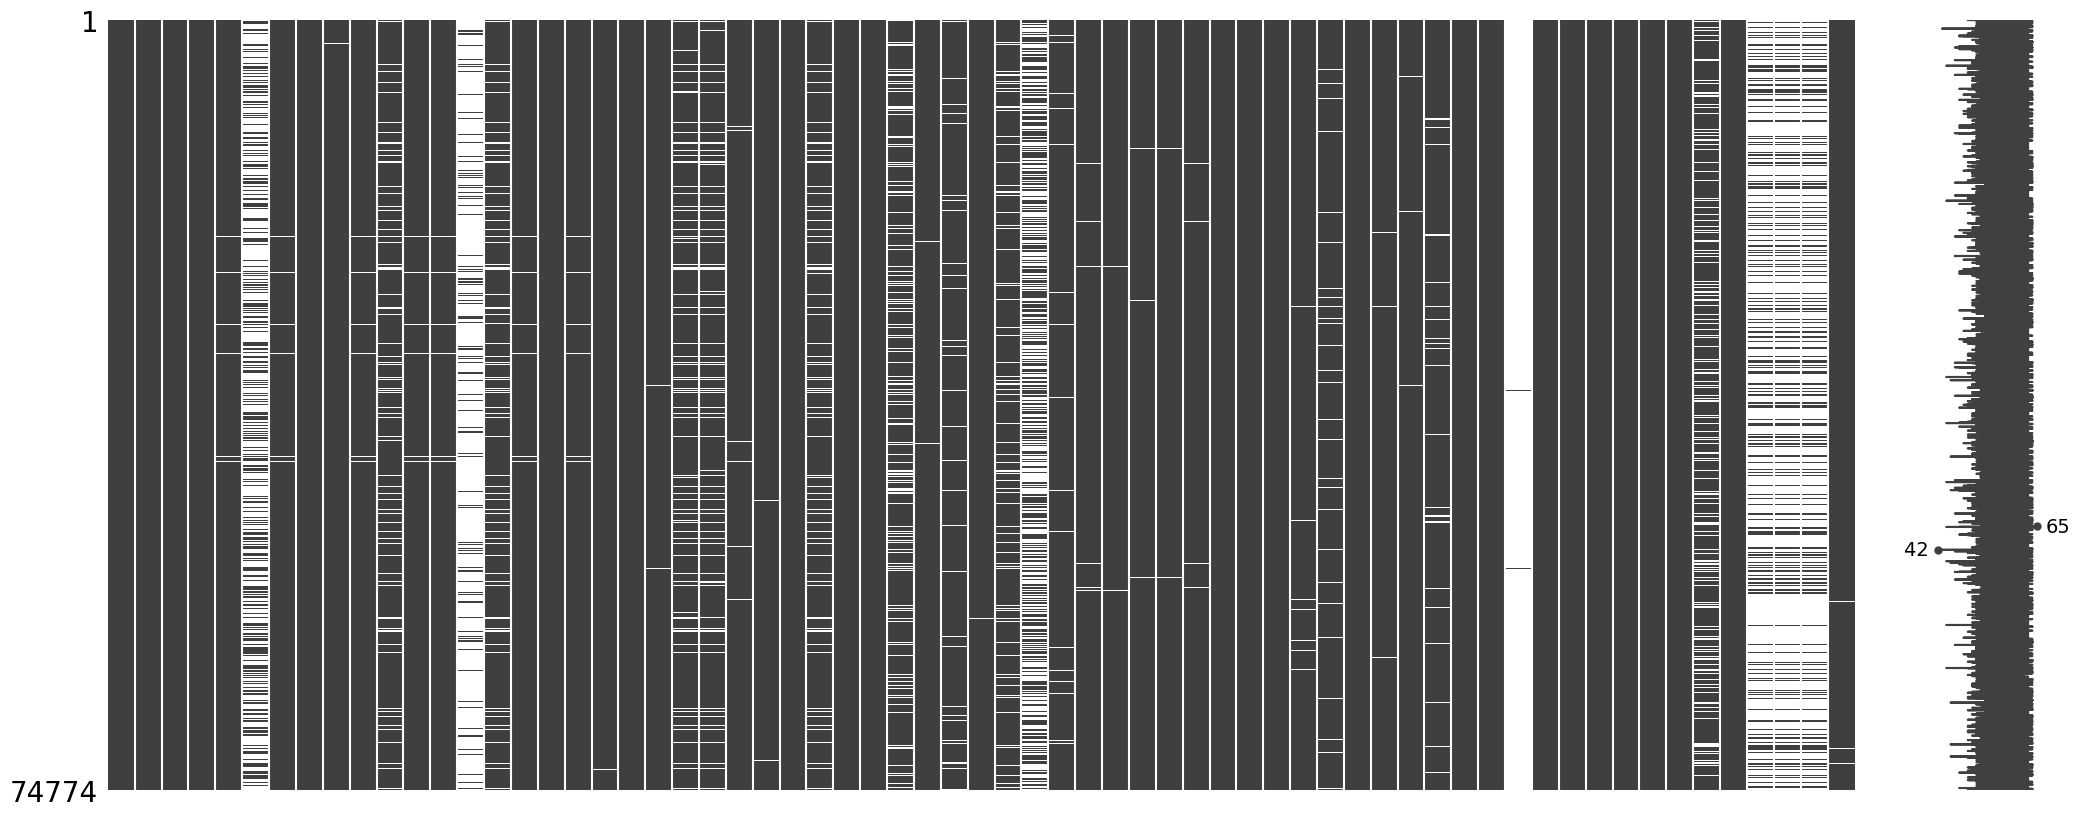

In [21]:
mso.matrix(sample_feature_df)

In [22]:
#sanity check
sample_feature_df["SMOKING"].value_counts()

SMOKING
0.0    36967
1.0    31507
2.0     6002
Name: count, dtype: int64

<Axes: >

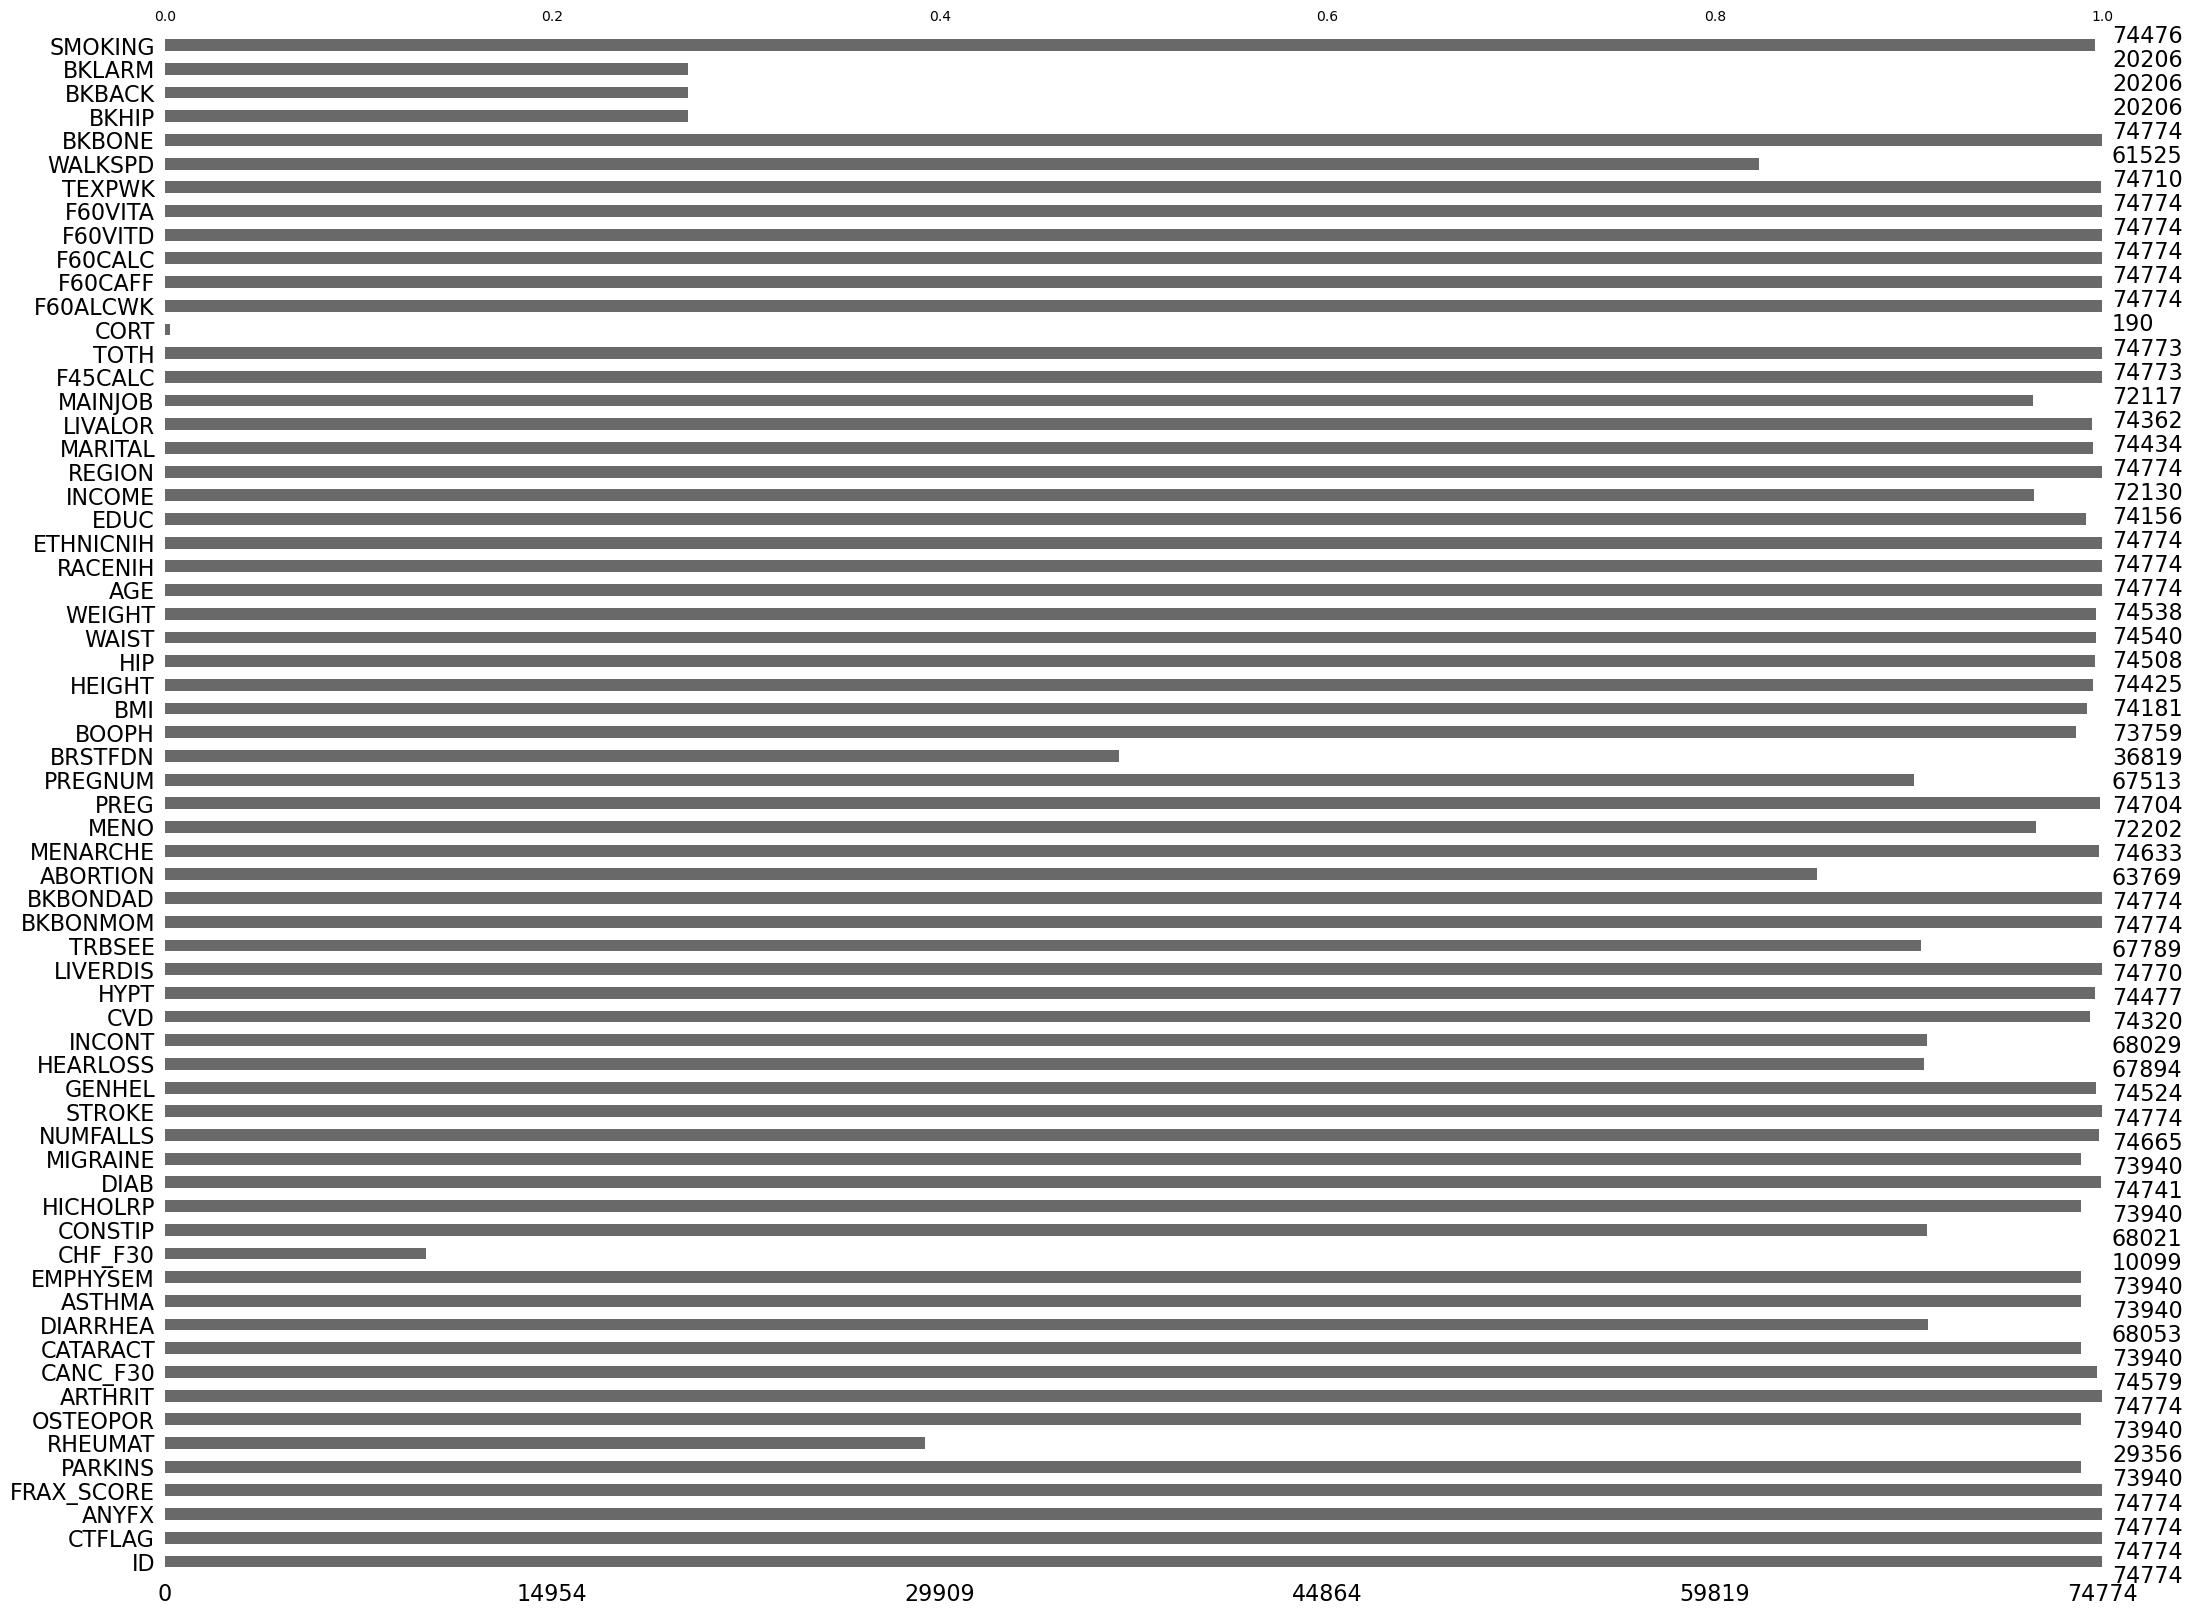

In [23]:
mso.bar(sample_feature_df)

<Axes: >

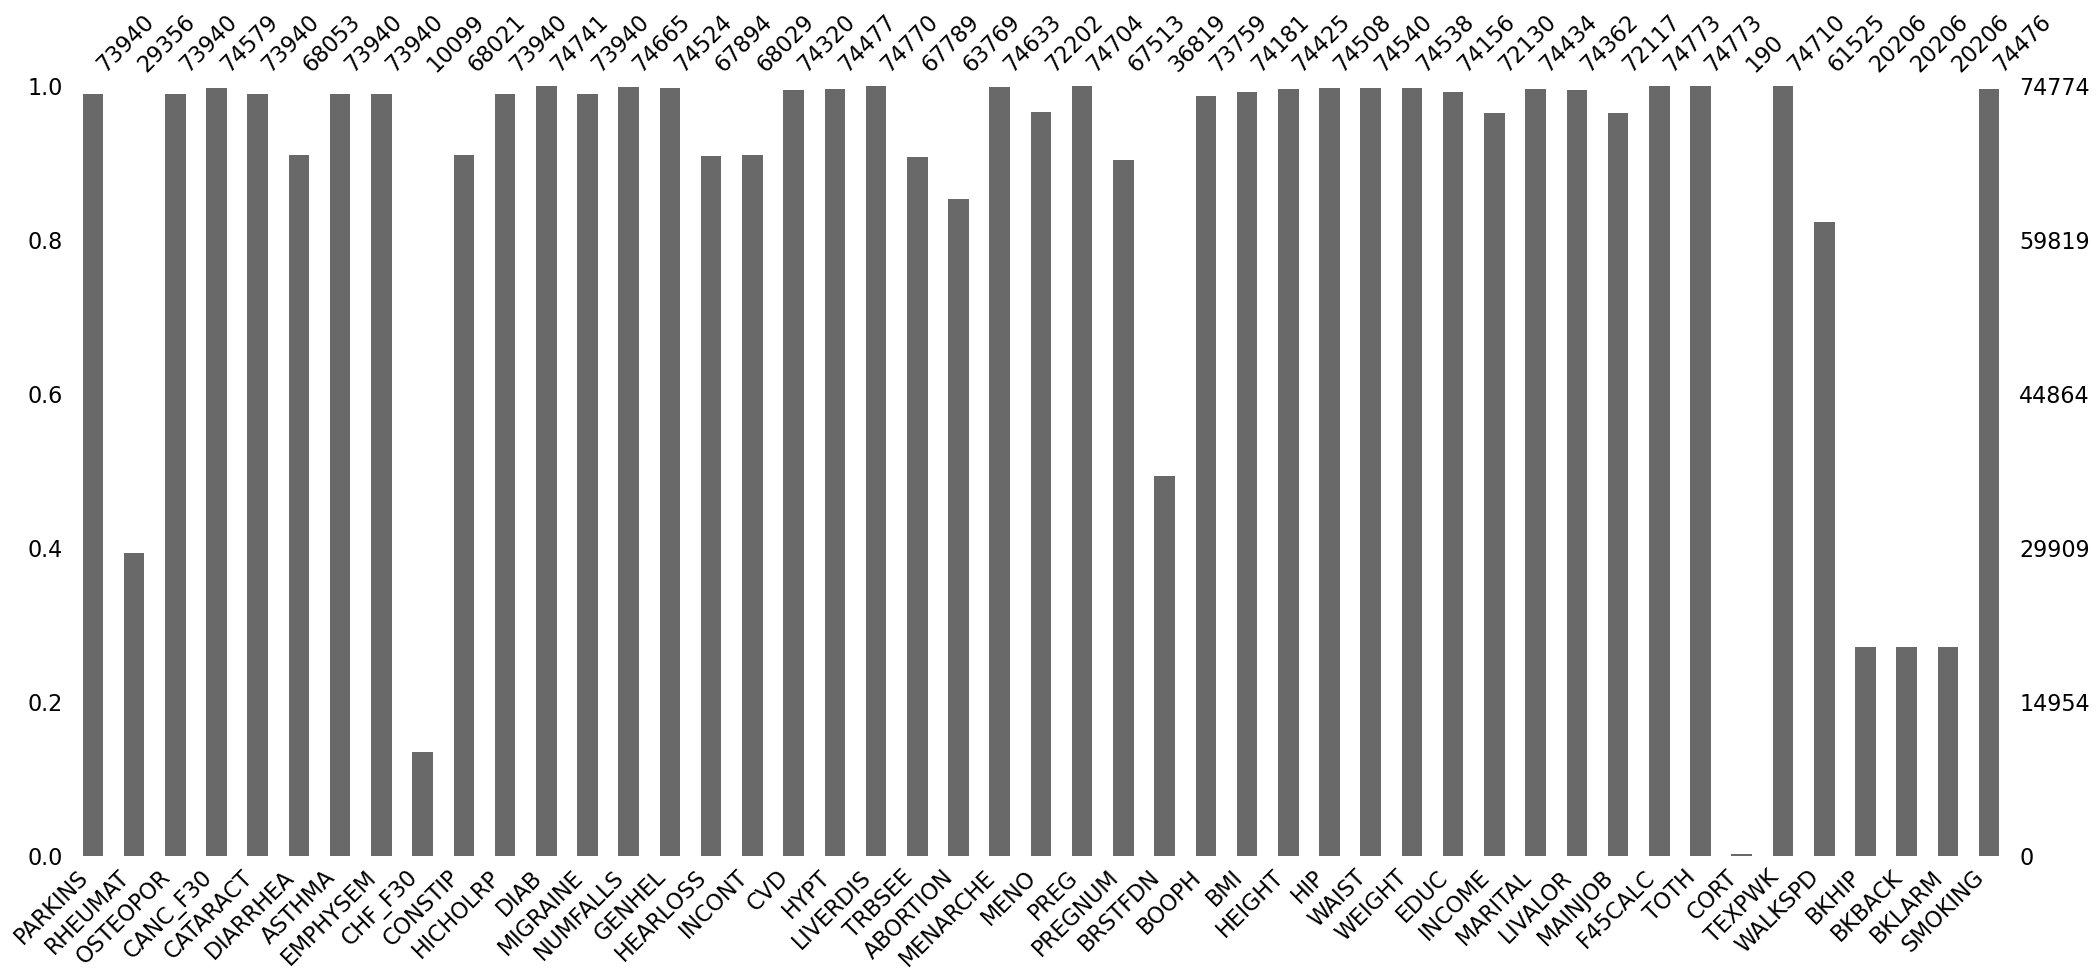

In [24]:
missing_columns = sample_feature_df.columns[sample_feature_df.isnull().any()]  # Select columns with missing values
subset_df = sample_feature_df[missing_columns]  # Create a subset with only those 
mso.bar(subset_df)

In [25]:
#impute subquestions
sample_feature_df["PARKINS"] = sample_feature_df["PARKINS"].fillna(0)
sample_feature_df["RHEUMAT"] = sample_feature_df["RHEUMAT"].fillna(0)
sample_feature_df["OSTEOPOR"] = sample_feature_df["OSTEOPOR"].fillna(0)
sample_feature_df["CANC_F30"] = sample_feature_df["CANC_F30"].fillna(0)
sample_feature_df["CATARACT"] = sample_feature_df["CATARACT"].fillna(0)
sample_feature_df["DIARRHEA"] = sample_feature_df["DIARRHEA"].fillna(0)
sample_feature_df["ASTHMA"] = sample_feature_df["ASTHMA"].fillna(0)
sample_feature_df["EMPHYSEM"] = sample_feature_df["EMPHYSEM"].fillna(0)
sample_feature_df["CHF_F30"] = sample_feature_df["CHF_F30"].fillna(0)
sample_feature_df["CONSTIP"] = sample_feature_df["CONSTIP"].fillna(0)
sample_feature_df["HICHOLRP"] = sample_feature_df["HICHOLRP"].fillna(0)
sample_feature_df["DIAB"] = sample_feature_df["DIAB"].fillna(0)
sample_feature_df["MIGRAINE"] = sample_feature_df["MIGRAINE"].fillna(0)
sample_feature_df["NUMFALLS"] = sample_feature_df["NUMFALLS"].fillna(0)
sample_feature_df["GENHEL"] = sample_feature_df["GENHEL"].fillna(0)
sample_feature_df["HEARLOSS"] = sample_feature_df["HEARLOSS"].fillna(0)
sample_feature_df["INCONT"] = sample_feature_df["INCONT"].fillna(0)
sample_feature_df["CVD"] = sample_feature_df["CVD"].fillna(0)
sample_feature_df["HYPT"] = sample_feature_df["HYPT"].fillna(0)
sample_feature_df["LIVERDIS"] = sample_feature_df["LIVERDIS"].fillna(0)
sample_feature_df["TRBSEE"] = sample_feature_df["TRBSEE"].fillna(0)
sample_feature_df["ABORTION"] = sample_feature_df["ABORTION"].fillna(2)
sample_feature_df["PREG"] = sample_feature_df["PREG"].fillna(0)
sample_feature_df["PREGNUM"] = sample_feature_df["PREGNUM"].fillna(0)
sample_feature_df["BRSTFDN"] = sample_feature_df["BRSTFDN"].fillna(0)
sample_feature_df["BOOPH"] = sample_feature_df["BOOPH"].fillna(0)
sample_feature_df["EDUC"] = sample_feature_df["EDUC"].fillna(7)
sample_feature_df["INCOME"] = sample_feature_df["INCOME"].fillna(9)
sample_feature_df["MARITAL"] = sample_feature_df["MARITAL"].fillna(4)
sample_feature_df["LIVALOR"] = sample_feature_df["LIVALOR"].fillna(4)
sample_feature_df["MAINJOB"] = sample_feature_df["MAINJOB"].fillna(0)
sample_feature_df["F45CALC"] = sample_feature_df["F45CALC"].fillna(0)
sample_feature_df["TOTH"] = sample_feature_df["TOTH"].fillna(0)
sample_feature_df["CORT"] = sample_feature_df["CORT"].fillna(0)
sample_feature_df["BKLARM"] = sample_feature_df["BKLARM"].fillna(0)
sample_feature_df["BKBACK"] = sample_feature_df["BKBACK"].fillna(0)
sample_feature_df["BKHIP"] = sample_feature_df["BKHIP"].fillna(0)
sample_feature_df["SMOKING"] = sample_feature_df["SMOKING"].fillna(0)
sample_feature_df["WALKSPD"] = sample_feature_df["WALKSPD"].fillna(9)


<Axes: >

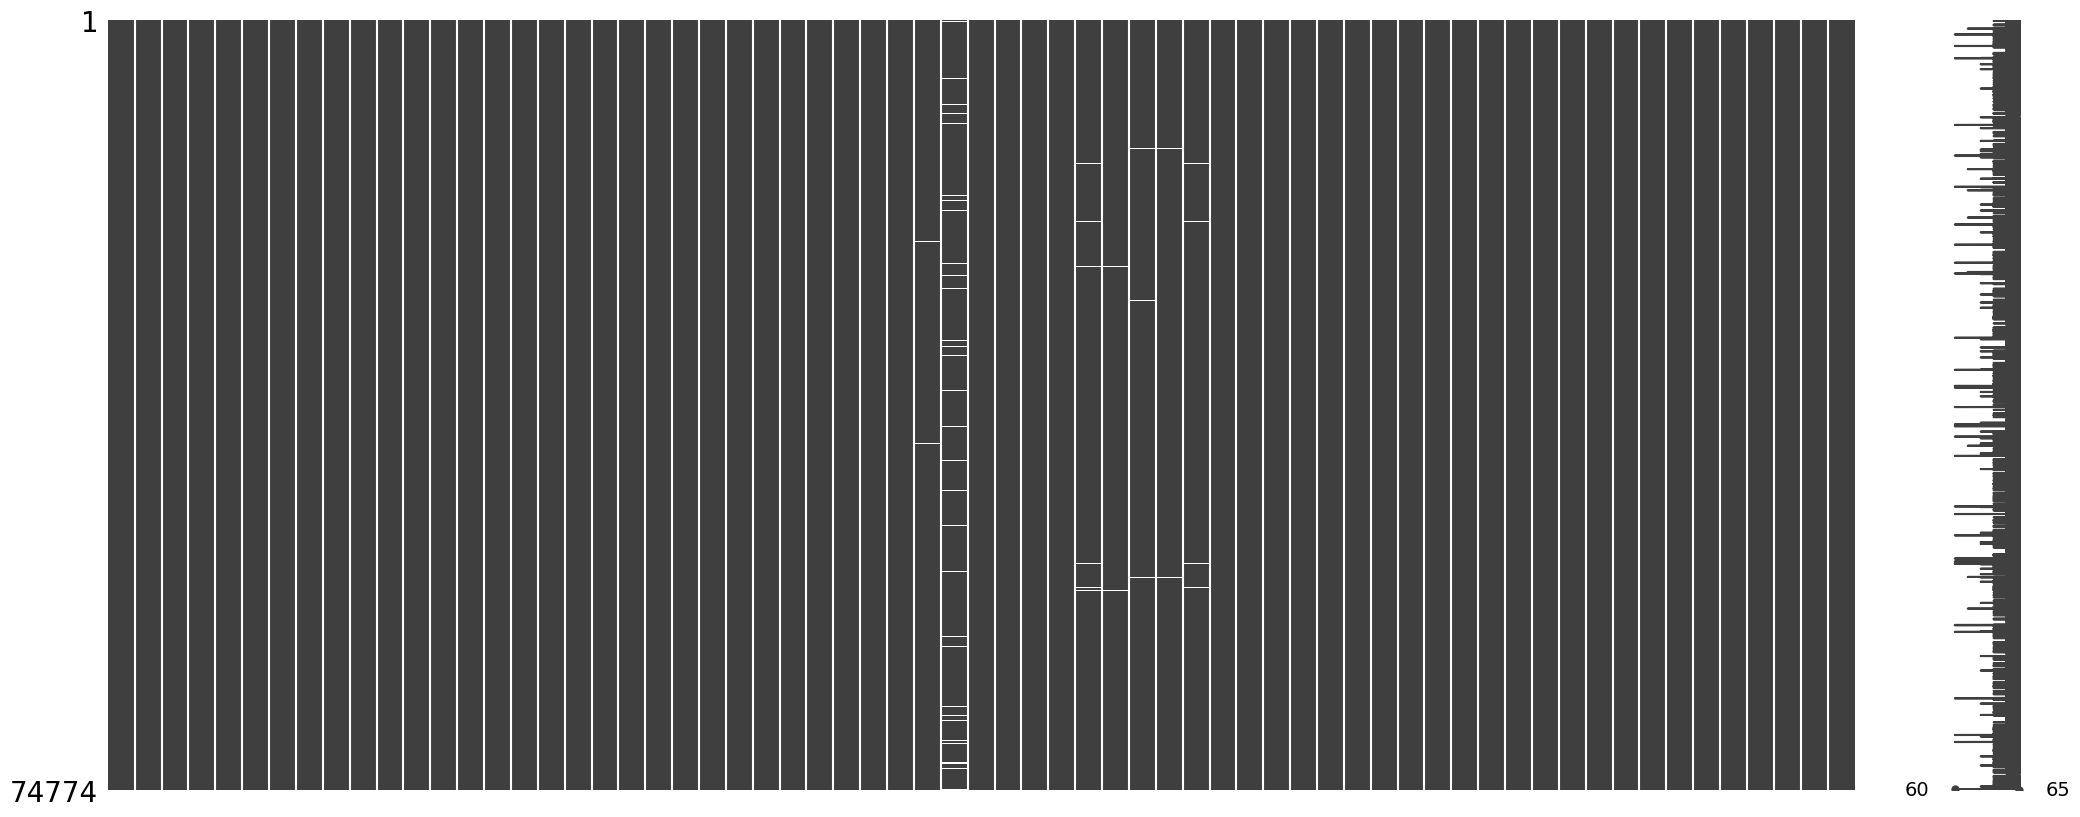

In [26]:
mso.matrix(sample_feature_df)

<Axes: >

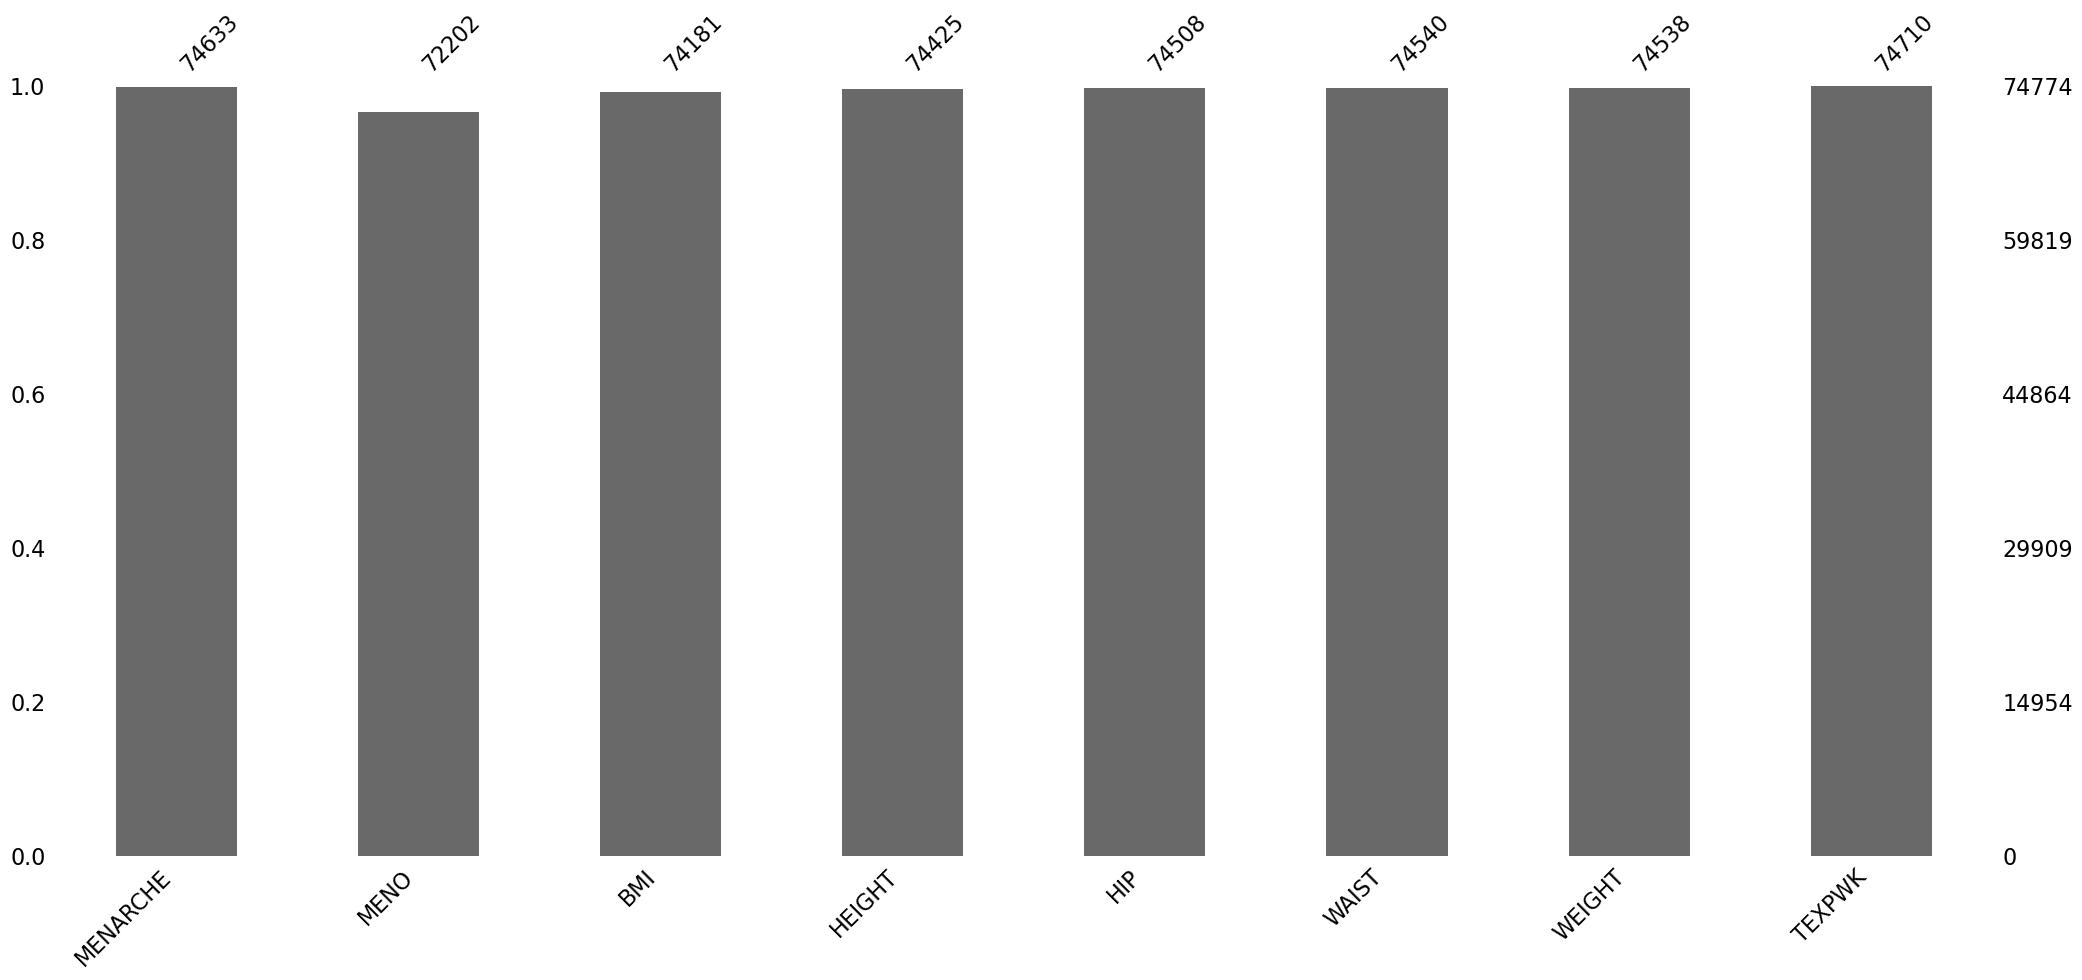

In [27]:
missing_columns = sample_feature_df.columns[sample_feature_df.isnull().any()]  # Select columns with missing values
subset_df = sample_feature_df[missing_columns]  # Create a subset with only those 
mso.bar(subset_df)

error with WEIGHT
(74774, 67)
(74204, 67)


<Axes: >

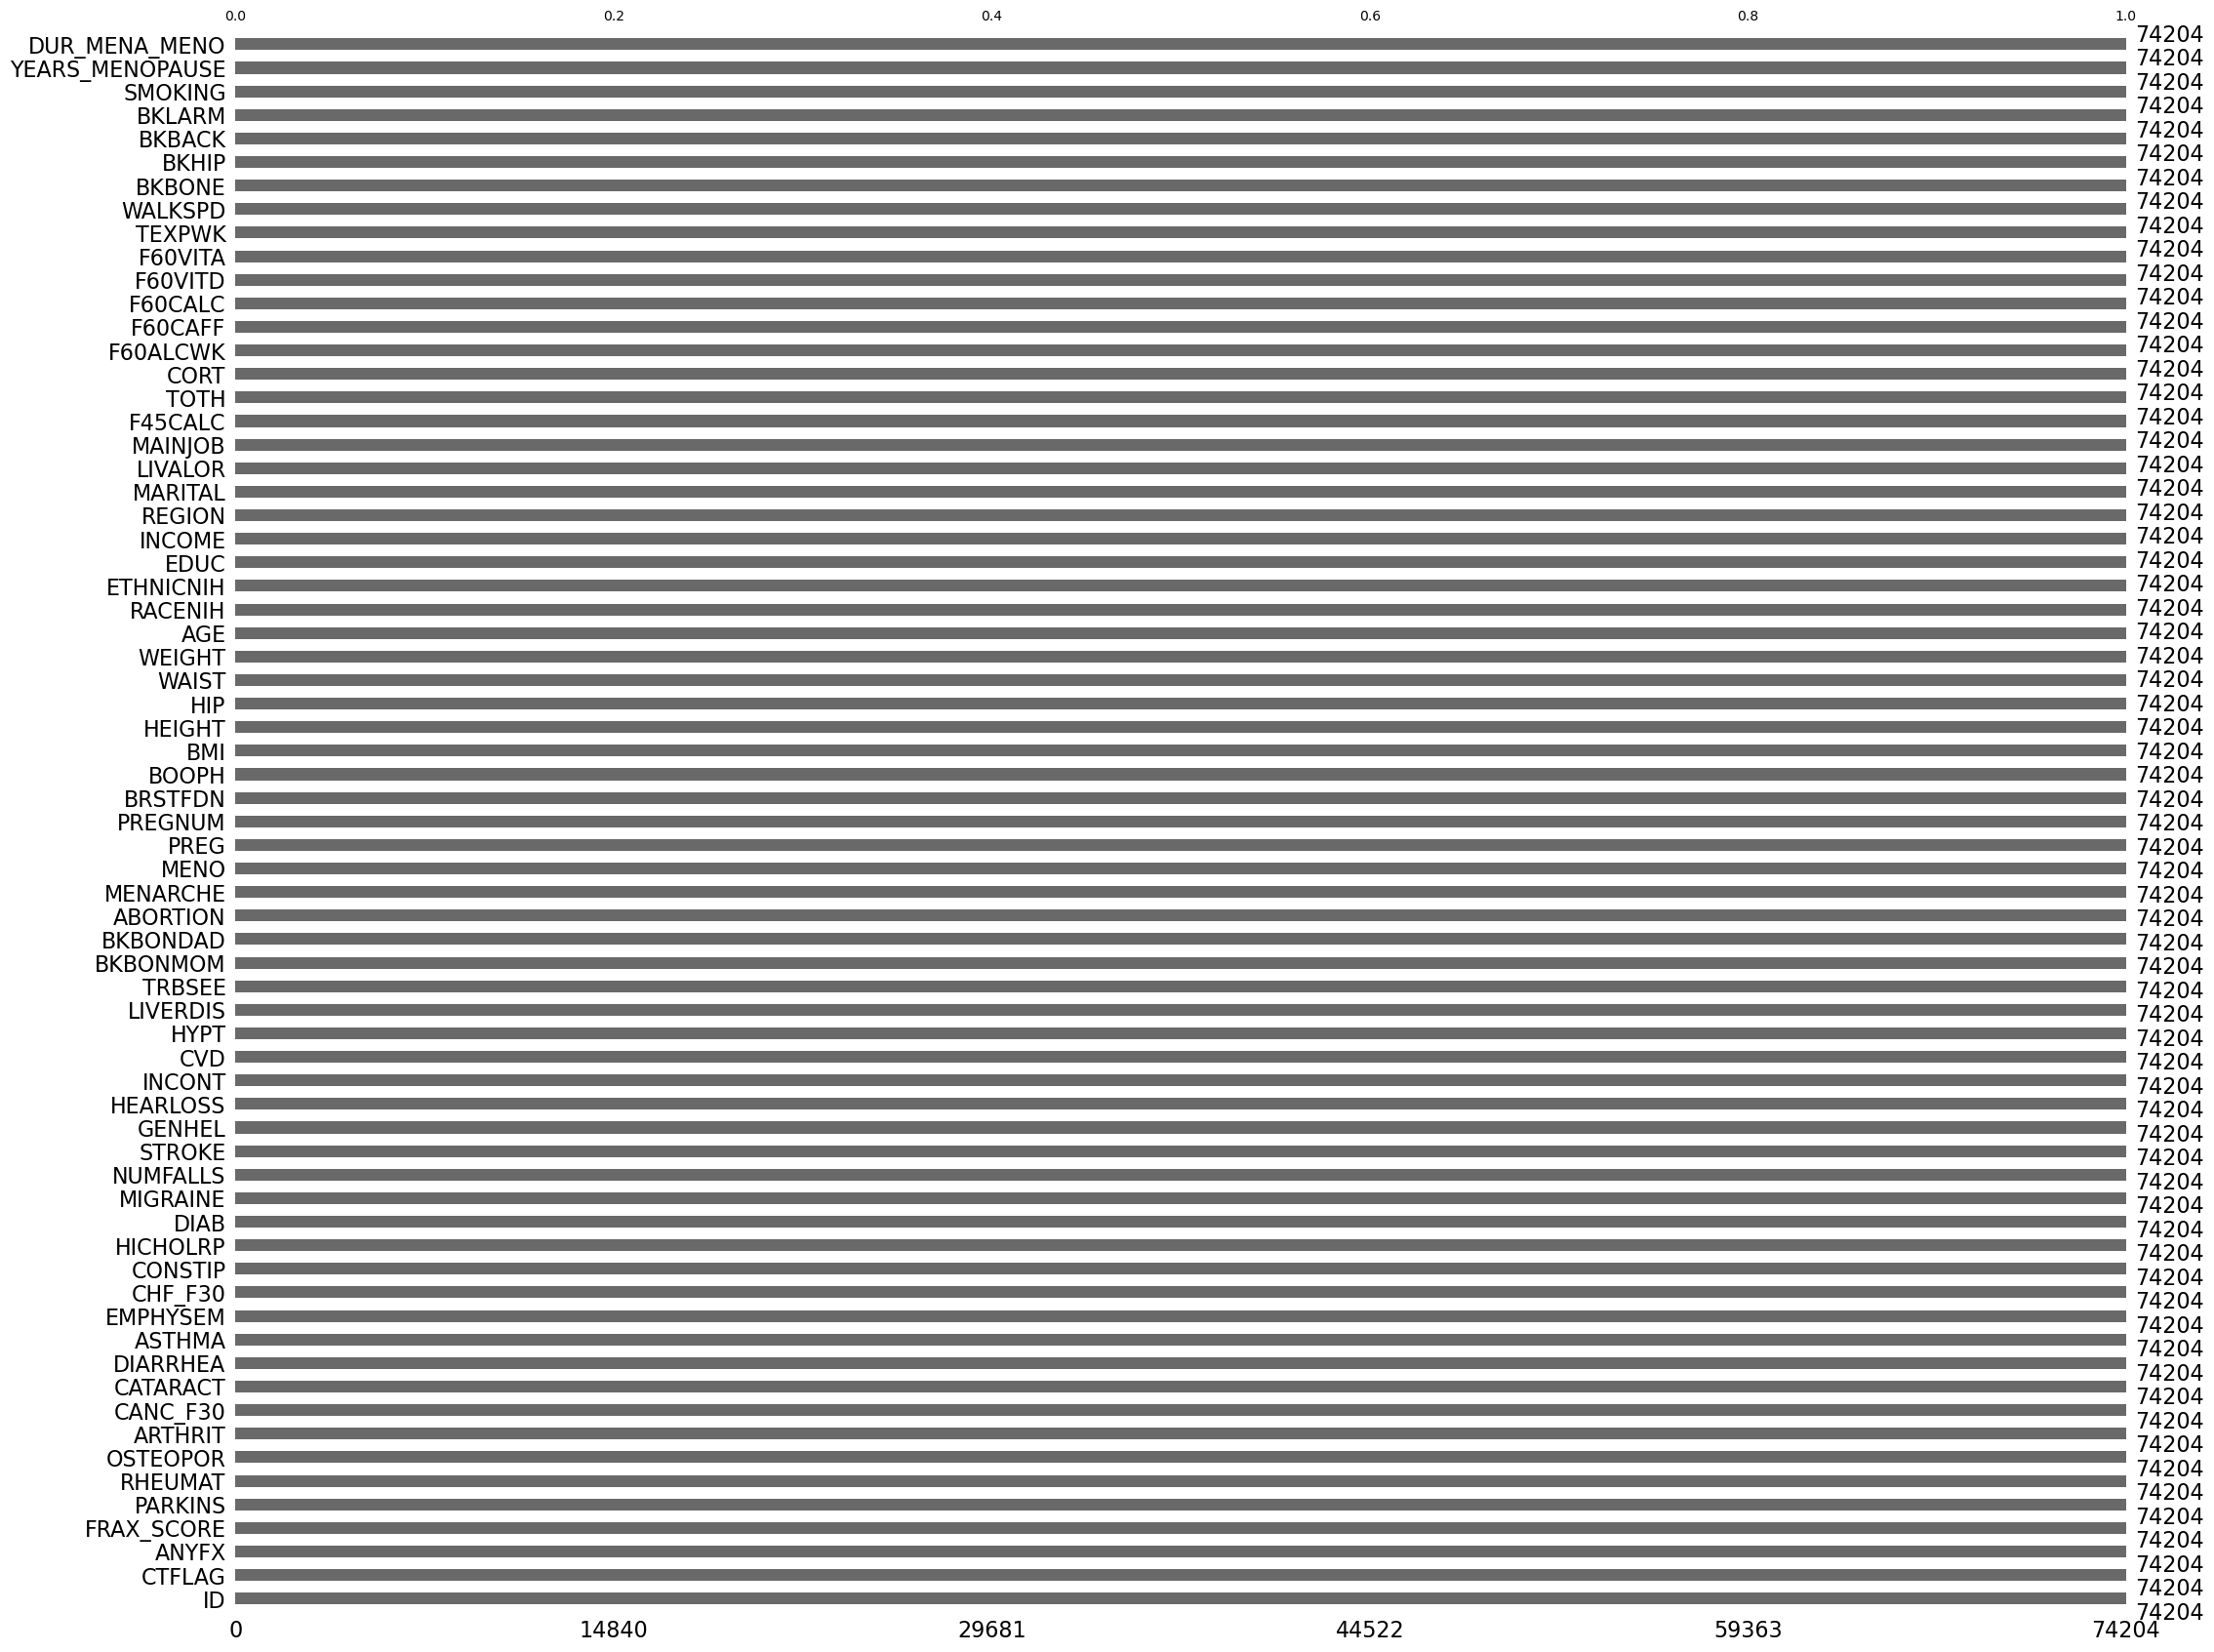

In [29]:
#want to impute WBMASS, SPNBMD, HIPBMD
column_means = ["MENO", "MENARCHE", "BMI", "HEIGHT", "WEIGHT", "WAIST", "HIP", "WEIGHT", "TEXPWK"]

mean_imputed_df = sample_feature_df[column_means].apply(lambda x: x.fillna(x.mean()))
try:
    for column in mean_imputed_df.columns.tolist():
        sample_feature_df[column] = mean_imputed_df[column]
except:
    print("error with", column)
sample_feature_df["YEARS_MENOPAUSE"] = sample_feature_df["AGE"] - sample_feature_df["MENO"]
sample_feature_df["DUR_MENA_MENO"] = sample_feature_df["MENARCHE"] - sample_feature_df["MENO"]


print(sample_feature_df.shape)
#remove samples with >30% of headers missing
threshold = sample_feature_df.shape[1] * 0.99  # 70% non-missing values required
final_df = sample_feature_df.dropna(thresh=threshold)
print(final_df.shape)
mso.bar(final_df)


In [71]:
sample_feature_df

,ID,CTFLAG,ANYFX,FRAX_SCORE,PARKINS,RHEUMAT,OSTEOPOR,ARTHRIT,CANC_F30,CATARACT,...,F60CALC,F60VITD,F60VITA,TEXPWK,WALKSPD,BKBONE,BKHIP,BKBACK,BKLARM,SMOKING
0,131073,1,0,6.14,0.0,0.0,0.0,0.0,0.0,0.0,...,1346.75342,7.92636,975.84083,2.50000,3.0,1.0,0.0,0.0,1.0,1.0
1,262147,1,0,8.05,0.0,8.0,0.0,1.0,0.0,0.0,...,965.85001,6.49924,848.40762,26.83333,3.0,0.0,0.0,0.0,0.0,1.0
2,131075,0,0,12.88,0.0,8.0,0.0,1.0,0.0,1.0,...,631.89585,2.43200,629.72861,21.00000,3.0,1.0,0.0,0.0,0.0,1.0
3,262149,0,0,8.78,0.0,8.0,0.0,1.0,0.0,0.0,...,768.10932,1.85852,339.14853,32.83333,4.0,0.0,0.0,0.0,0.0,1.0
4,262150,1,1,1.73,0.0,0.0,0.0,0.0,0.0,0.0,...,536.54505,3.63204,1574.51101,21.83333,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74769,262130,1,0,3.07,0.0,0.0,0.0,0.0,0.0,0.0,...,414.01853,2.00980,668.50414,0.00000,3.0,1.0,0.0,0.0,0.0,0.0
74770,131066,1,0,3.94,0.0,0.0,0.0,0.0,0.0,0.0,...,450.93347,2.70774,334.67271,7.50000,3.0,0.0,0.0,0.0,0.0,0.0
74771,262131,0,0,4.45,0.0,0.0,0.0,0.0,0.0,0.0,...,1543.24417,8.60105,1195.77043,17.08333,3.0,0.0,0.0,0.0,0.0,1.0
74772,131068,1,0,8.54,0.0,0.0,0.0,0.0,0.0,0.0,...,1219.16215,9.84910,1169.27512,0.00000,NaN,1.0,0.0,0.0,0.0,0.0


In [30]:
final_df.to_csv("AI_READY_DF.csv")